In [1]:
# Import scripts
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn.linear_model import LinearRegression
#open csv into dataset
bas = "Datasets/age_and_sex.csv"
bas = pd.read_csv(bas)
bas.head()


,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Medicaid,Dental Services,Total,Total,3709,4264,4791,6246,8392,8493,9773,11889,12644,12637
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738


In [2]:
#Clean csv to only wanted data
payer_data_total = bas[bas["Payer"]=="Total"]
service_data_total = payer_data_total[payer_data_total["Service"]=="Total Personal Health Care"]
age_data_total = service_data_total[service_data_total["Age Group"]=="Total"]

age_data_total.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1134,Total,Total Personal Health Care,Total,Total,1365481,1582380,1806451,2007153,2180461,2346202,2527086,2795558,3019769,3366975
1140,Total,Total Personal Health Care,Total,Males,587266,680026,783910,872613,965308,1050368,1136102,1246245,1354777,1548394
1146,Total,Total Personal Health Care,Total,Females,778215,902354,1022542,1134540,1215153,1295834,1390984,1549313,1664992,1818581


In [3]:
#make index
clean_data= age_data_total.loc[:,["Sex", "2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2020"]]

In [45]:
#make index pt2
health_index = clean_data.set_index("Sex")

In [29]:
#switch columns and rows
health_index_t = health_index.T
health_index_t.index

Index(['2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016', '2018',
       '2020'],
      dtype='object')

In [48]:
#print new data set
health_index_t

Sex,Total,Males,Females
2002,1365481,587266,778215
2004,1582380,680026,902354
2006,1806451,783910,1022542
2008,2007153,872613,1134540
2010,2180461,965308,1215153
2012,2346202,1050368,1295834
2014,2527086,1136102,1390984
2016,2795558,1246245,1549313
2018,3019769,1354777,1664992
2020,3366975,1548394,1818581


In [64]:
#defining your linear regression
def plot_linear_regression(x_values, y_values, label):
    X = np.array(x_values).reshape(-1, 1)  # Reshape for sklearn
    y = np.array(y_values)
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, color='blue', label='Data points')
    plt.plot(x_values, y_pred, color='red', label='Fitted line')
    plt.xlabel('Year')
    plt.ylabel('Spending ($Trillions)')
    plt.title(f'Linear Regression for {label}')
    
    # Adding x-axis ticks for the years
    plt.xticks(ticks=x_values, labels=[str(year) for year in x_values], rotation=45)
    
    
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
    plt.show()

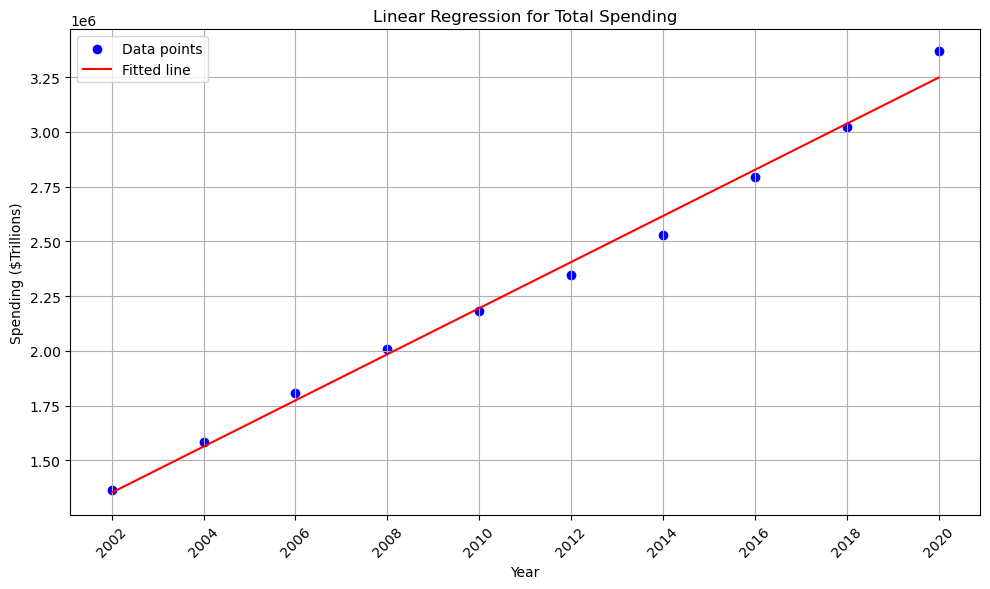

In [65]:
#Plot Graph(Total)
years = [2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]
plot_linear_regression(years, health_index_t['Total'], 'Total Spending')

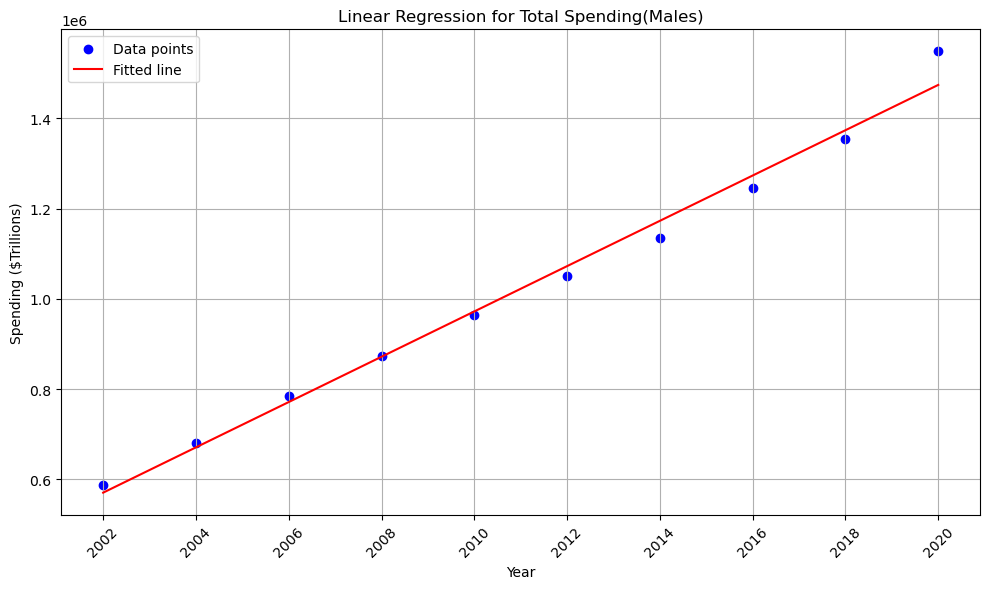

In [66]:
#Plot Graph(Males)
years = [2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]
plot_linear_regression(years, health_index_t['Males'], 'Total Spending(Males)')

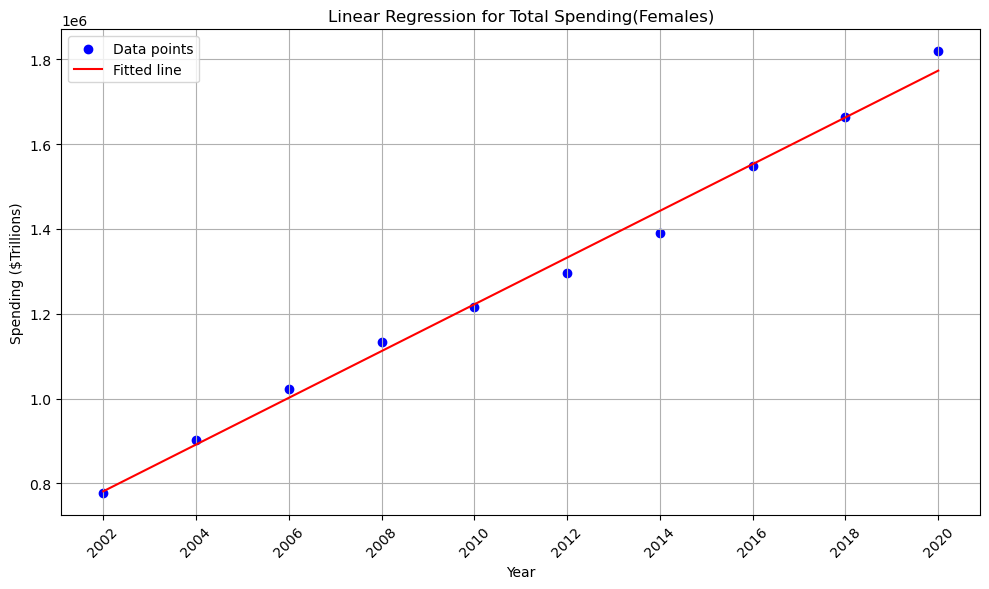

In [67]:
#Plot Graph(Females)
years = [2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]
plot_linear_regression(years, health_index_t['Females'], 'Total Spending(Females)')